<a href="https://colab.research.google.com/github/Gabriella-rns/Efici-ncia-Automotiva/blob/main/MPG_combustivel_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregando dataset seaborn
df = sns.load_dataset('mpg')

# Visualização os dados
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* MPG: Milhas por galão (alvo da regressão linear).
* Cylinders: Número de cilindros.
* Displacement: Volume do motor.
* Horsepower: Potência do motor.
* Weight: Peso do carro.
* Acceleration: Aceleração.
* Model Year: Ano do modelo.
* Origin: Local de fabricação.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
origin = df['origin'].unique()
origin

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
# Transformação da coluna 'origin' em dummy
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Exclusão da coluna 'name'
df = df.drop(columns=['name'])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,True


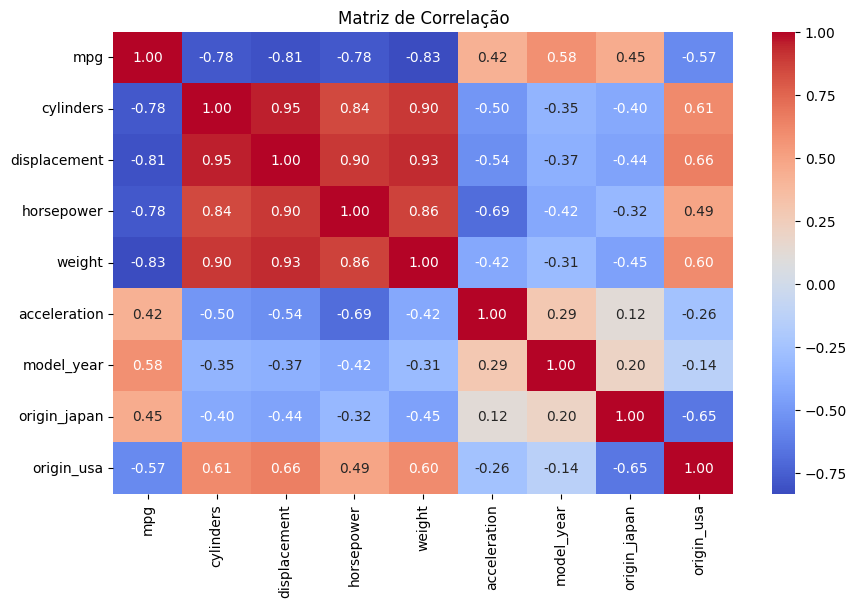

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

**Matriz de Correlação**

* Correlação forte positiva (+1): À medida que uma variável aumenta, a outra também aumenta.
* Correlação forte negativa (-1): À medida que uma variável aumenta, a outra diminui.
* Correlação fraca (~0): As variáveis não têm relação linear significativa.

Para analisar a correlação eu preciso comparar as variáveis com a target. Nesse caso o target é mpg

Na matriz de correlação:
- O peso e a potência (weight e horsepower) têm alta correlação negativa. Carros mais pesados ou potentes, consomem mais combustível.

- O modelo do carro possui uma correlação moderada positiva. Modelos mais recentes são mais eficientes.

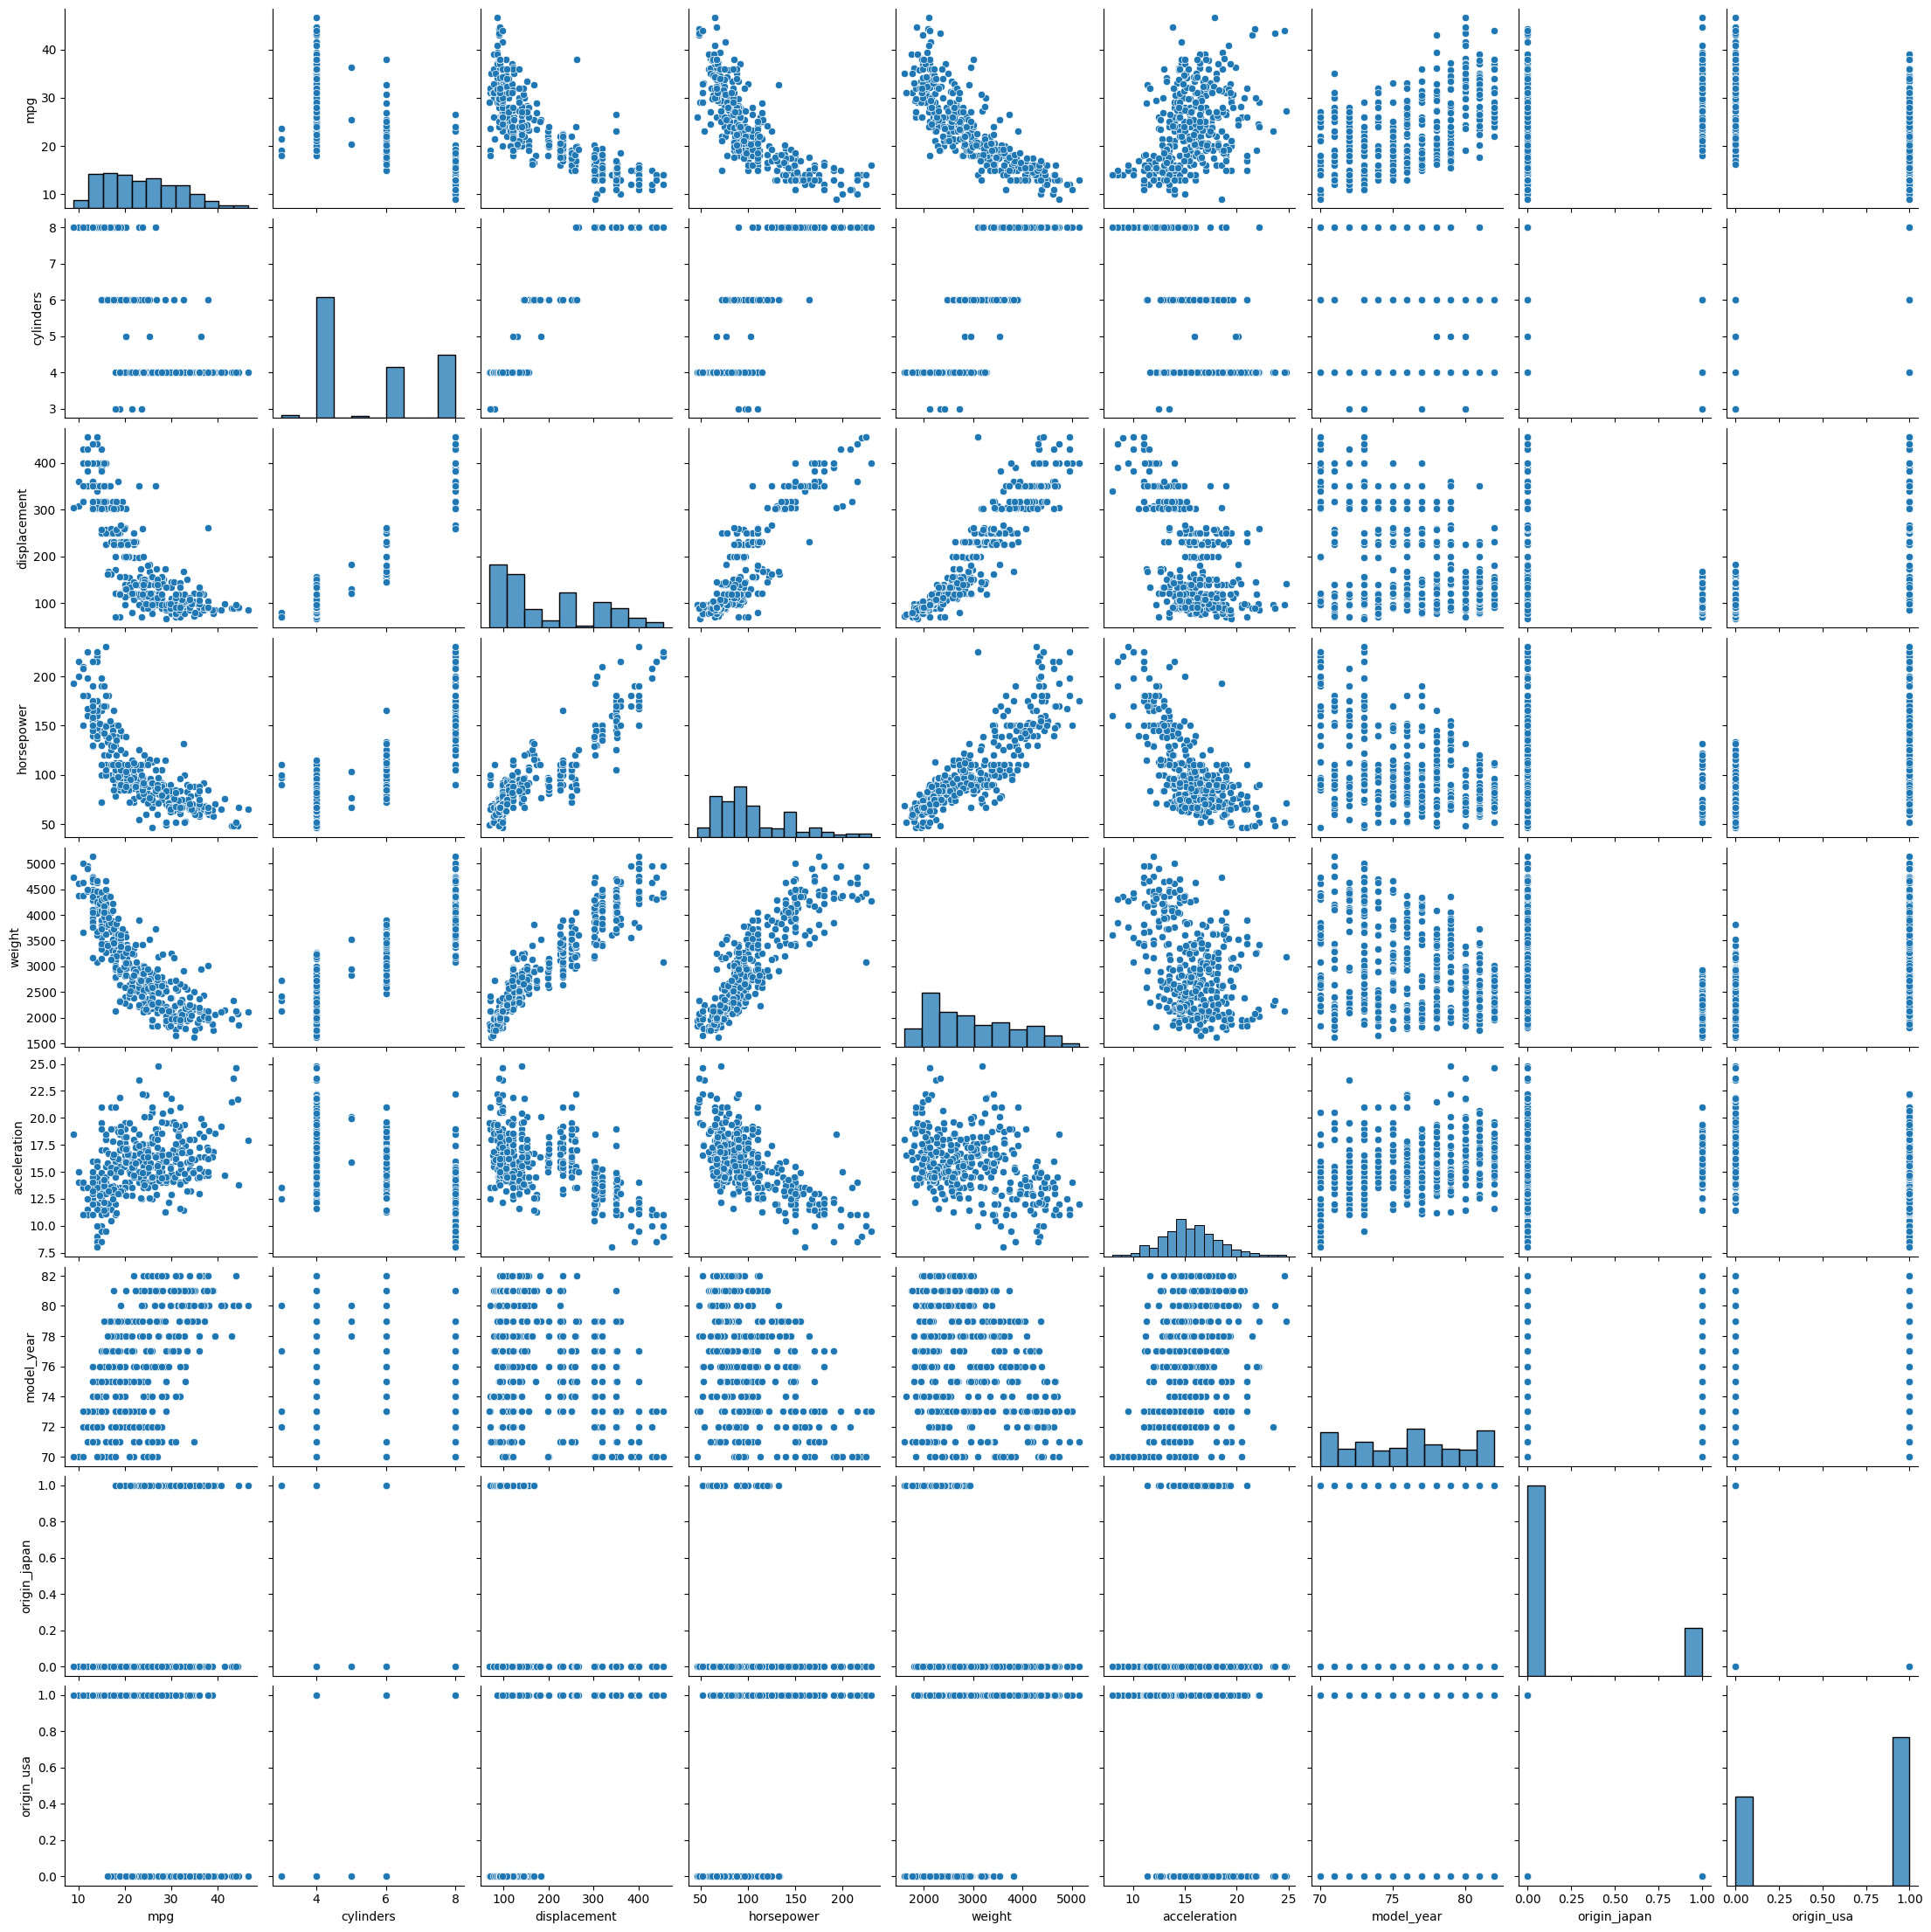

In [ ]:
sns.pairplot(df)

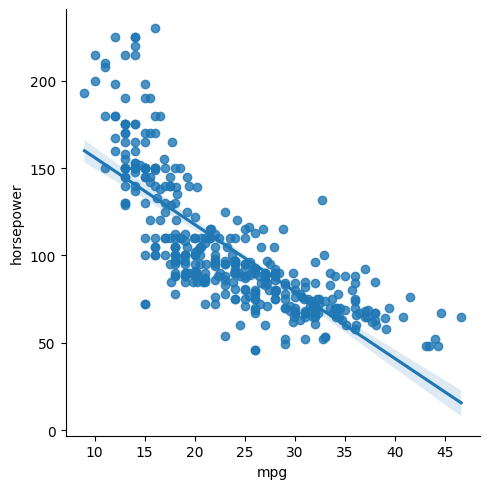

In [ ]:
sns.lmplot(x='mpg', y='horsepower', data = df)

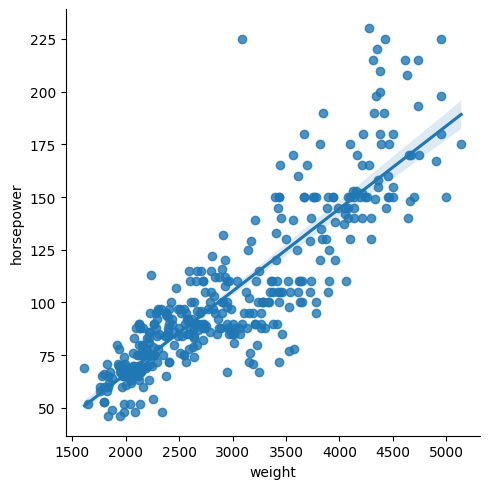

In [ ]:
sns.lmplot(x='weight', y='horsepower', data = df)

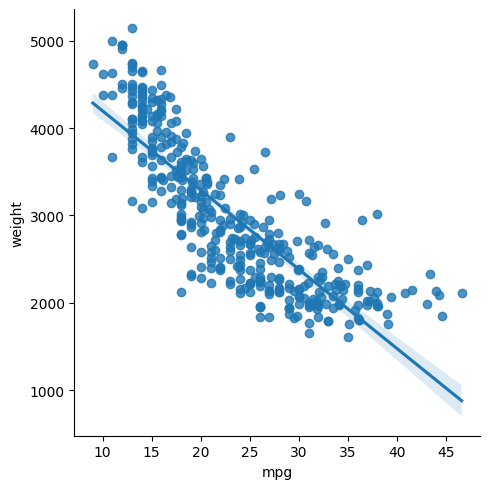

In [ ]:
sns.lmplot(x='mpg', y='weight', data = df)

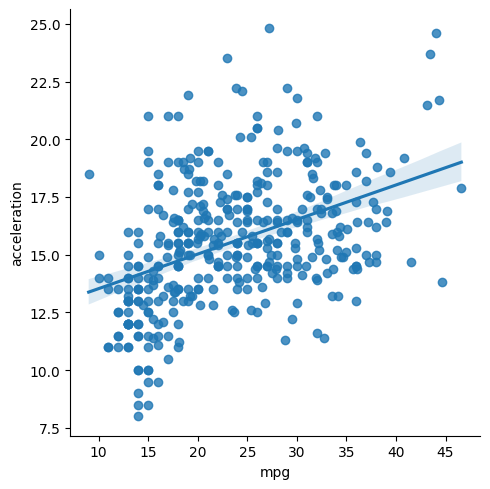

In [ ]:
sns.lmplot(x='mpg', y='acceleration', data = df)

In [ ]:
# Separando variáveis
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df['mpg']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do treino X: {X_train.shape}, Tamanho do teste X: {X_test.shape}")


Tamanho do treino X: (313, 6), Tamanho do teste X: (79, 6)


In [ ]:
# Criação do modelo de Regressão Linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Coeficientes do modelo
coeficientes = pd.DataFrame(model.coef_,X.columns)
coeficientes.columns = ['Coeficientes']
coeficientes

coeficientes

,Coeficientes
cylinders,-0.116173
displacement,0.001013
horsepower,-0.002276
weight,-0.006561
acceleration,0.061736
model_year,0.760636


In [ ]:
print("Intercepto do modelo:", model.intercept_)

Intercepto do modelo: -15.057758585282361


* Coeficiente positivo: Se o coeficiente de uma variável for positivo, isso significa que, à medida que a variável aumenta, o MPG também tende a aumentar.
* Coeficiente negativo: Se o coeficiente de uma variável for negativo, isso significa que, à medida que a variável aumenta, o MPG tende a diminuir.

Intercepto (-15): Quando o peso e a potência são zero, a eficiência de combustível seria -15 MPG. Na prática, esse valor não faz muito sentido físico (um carro com todas as características igual a zero não existe), mas é necessário para ajustar a linha de regressão.

O intercepto define onde a linha de regressão começa no eixo y.
Os coeficientes indicam o impacto de cada variável independente sobre a variável dependente (no caso, o MPG).

* Para cada aumento de 1 cilidro, o MPG diminui 0.1
* Para cada aumento de 1 volume do motor, o MPG aumenta 0.001 (não possui um impacto relevante)
* Para cada aumento de 1 potência, o MPG diminui 0.002
* Para cada aumento de 1 peso, o MPG diminui 0.006 (quanto mais pesado o carro, menor o mpg)
* Para cada aumento de 1 aceleração, o MPG aumenta 0.06
* Os carros mais novos têm maior eficiência (maior impacto positivo no mpg)

(Como analisa todas as variáveis juntas, não é possível ter tanta certeza. A correlação analisa as variáveis separadamente, por isso deu diferente na potência e no peso)

Correlação: Examina a relação entre duas variáveis isoladamente.
Regressão: Examina a relação entre uma variável dependente e várias variáveis independentes simultaneamente, levando em consideração o impacto de todas as variáveis ao mesmo tempo.

In [ ]:
# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 3.24
R²: 0.79


RMSE é uma métrica que mede a média da diferença entre os valores reais e os valores previstos. É uma medida de erro absoluto que indica o quanto as previsões do modelo estão distantes dos valores reais

O modelo consegue prever o consumo de combustível com um desvio médio de aproximadamente 3 milhas por galão.


R²: métrica que avalia a proporção da variabilidade dos dados que o modelo consegue explicar. Ele indica o quão bem o modelo de regressão se ajusta aos dados.

79% da variabilidade do mpg é explicada pelo modelo

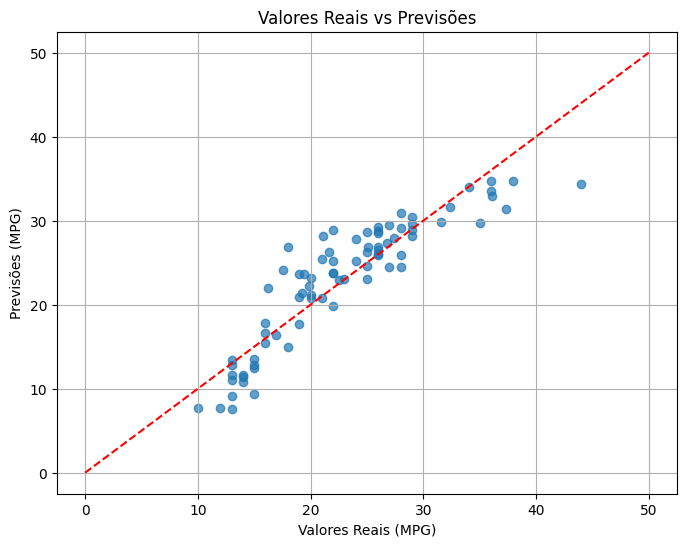

In [ ]:
#Gráfico de Dispersão: Previsões vs Valores Reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 50], [0, 50], color='red', linestyle='--')  # Linha ideal
plt.xlabel("Valores Reais (MPG)")
plt.ylabel("Previsões (MPG)")
plt.title("Valores Reais vs Previsões")
plt.grid(True)
plt.show()

In [ ]:
coeficientes = pd.DataFrame(model.coef_,X.columns)
coeficientes.columns = ['Coeficientes']
coeficientes

,Coeficientes
cylinders,-0.116173
displacement,0.001013
horsepower,-0.002276
weight,-0.006561
acceleration,0.061736
model_year,0.760636


**Deep Learning**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_japan', 'origin_usa'],
      dtype='object')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,True
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalonar as variáveis numéricas
scaler = StandardScaler()
df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']] = scaler.fit_transform(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

# Separar variáveis independentes (X) e dependente (y)
X = df.drop('mpg', axis=1)  # Variáveis independentes
y = df['mpg']  # Variável dependente


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir o modelo
model = Sequential()

# Adicionar camadas
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Primeira camada densa
model.add(Dense(32, activation='relu'))  # Segunda camada densa
model.add(Dense(1))  # Camada de saída com 1 neurônio (previsão do MPG)

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumo do modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.8299 - val_loss: 0.5371
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6916 - val_loss: 0.4248
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5740 - val_loss: 0.3416
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4706 - val_loss: 0.3085
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4545 - val_loss: 0.2994
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4545 - val_loss: 0.3023
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3774 - val_loss: 0.2997
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3861 - val_loss: 0.3027
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3227 - val_loss: 0.2954
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3031 - val_loss: 0.2901
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3800 - val_loss: 0.2925
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [ ]:
# Avaliar o modelo
test_loss = model.evaluate(X_test, y_test)
print(f"Erro no teste (loss): {test_loss}")

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular RMSE
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2743 
Erro no teste (loss): 0.27446261048316956
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RMSE: 0.5238918064619088
R²: 0.6732580305896094


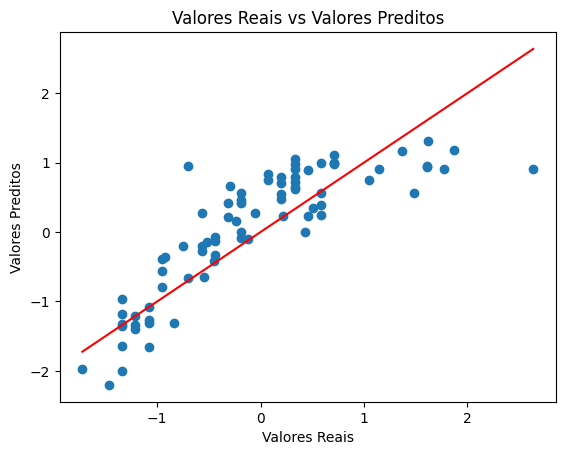

In [ ]:
import matplotlib.pyplot as plt

# Plotando o erro (resíduos) entre valores reais e previstos
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Linha de 45 graus (perfeição)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Valores Preditos')
plt.show()


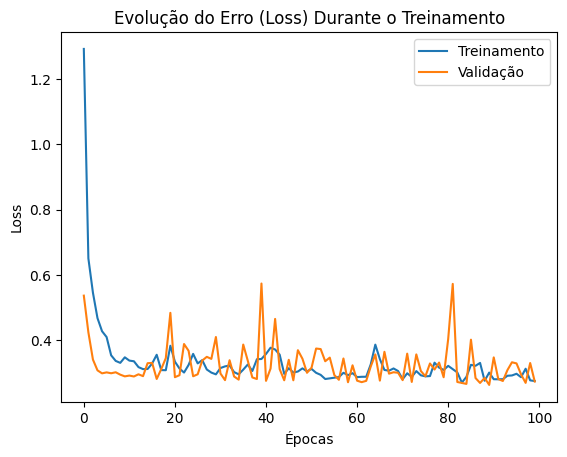

In [ ]:
# Plotando a evolução da perda (loss) durante o treinamento
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Evolução do Erro (Loss) Durante o Treinamento')
plt.legend()
plt.show()


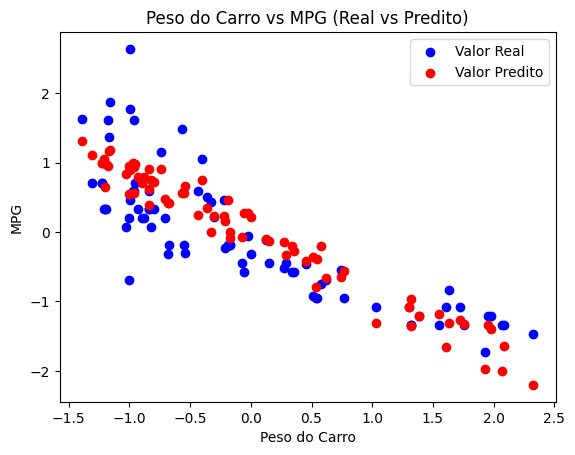

In [ ]:
# Selecione algumas variáveis, por exemplo, 'weight' e 'mpg'
plt.scatter(X_test['weight'], y_test, color='blue', label='Valor Real')
plt.scatter(X_test['weight'], y_pred, color='red', label='Valor Predito')
plt.xlabel('Peso do Carro')
plt.ylabel('MPG')
plt.title('Peso do Carro vs MPG (Real vs Predito)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar os dados
df['economico'] = (df['mpg'] > df['mpg'].mean()).astype(int)

# Selecionar as variáveis independentes e dependentes
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df['economico']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar a rede neural
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))  # Camada oculta
model.add(Dense(8, activation='relu'))  # Outra camada oculta (opcional)
model.add(Dense(1, activation='sigmoid'))  # Camada de saída

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


In [ ]:
model.summary()
